In [27]:
from utils import load_input_image, rgb2gray
import matplotlib.pyplot as plt
import numpy as np
import scipy.ndimage as ndi
import cv2 
import skimage

In [2]:
imgs = {i: load_input_image(i) for i in range(15)}

In [174]:
# _,axes = plt.subplots(3,5, figsize=(10,5))
# for i,ax in enumerate(axes.ravel()):    
#     ax.imshow(imgs[i])
#     ax.axis("off")
# plt.tight_layout()

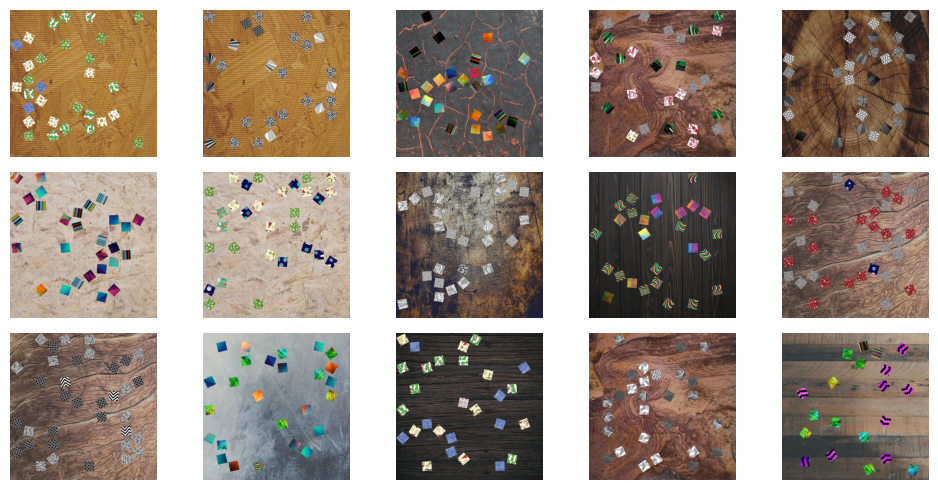

In [3]:
img=imgs[0]

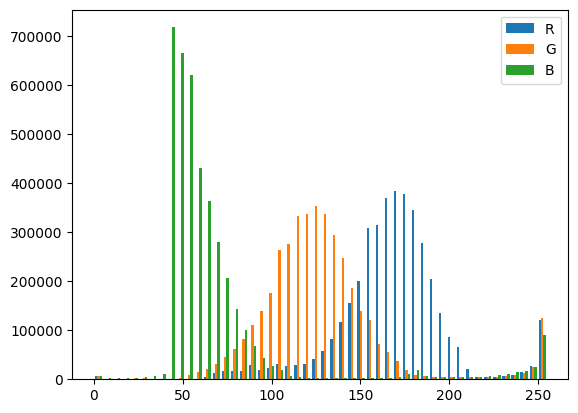

In [4]:
plt.hist([img[:,:,i].ravel() for i in range(3)], bins=50, label=["R","G","B"])
plt.legend()
plt.show()

In [5]:
frequency = 0.15
kernel = skimage.filters.gabor_kernel(
    frequency, theta=2, sigma_x=4, sigma_y=4, n_stds=3, offset=0
)

grayImage = rgb2gray(img)
filtered = ndi.convolve(grayImage, kernel, mode="wrap")


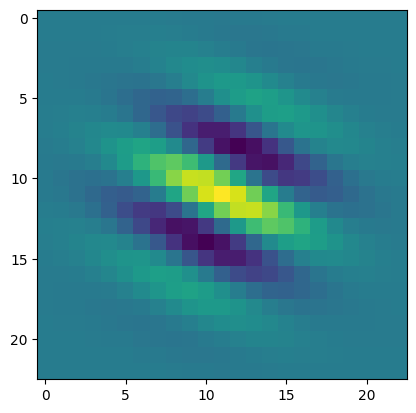

In [6]:
plt.imshow(np.real(kernel))

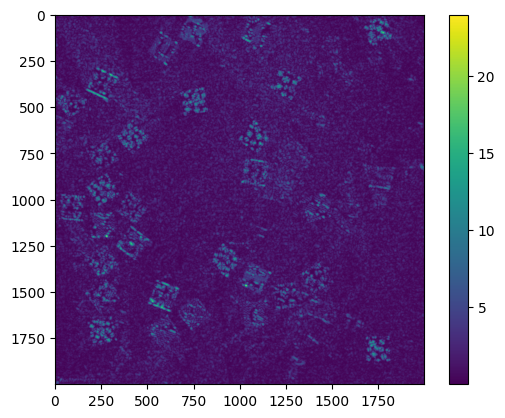

In [7]:
plt.imshow(np.sqrt(np.imag(filtered)**2+np.real(filtered)**2))
plt.colorbar()

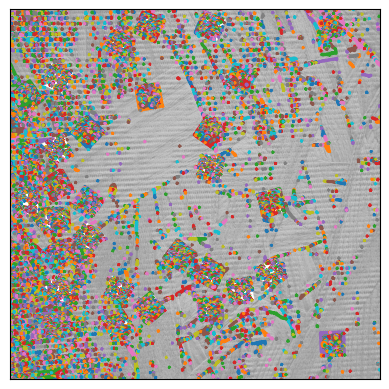

In [181]:
from skimage.measure import find_contours

img_gray = img[:,:,0]
# Find contours at a constant value of 0.8
contours =  find_contours(img_gray)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(img_gray, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [188]:
print(len(contours))

12965


In [197]:
def okay_contour(contour):
    if len(contour)>4*(128-30) and len(contour)<4*(128+30):
        return True
    return False

In [198]:
filtered_contour = filter(okay_contour,contours)
okay_cnt = list(filtered_contour)
print(len(okay_cnt))

18


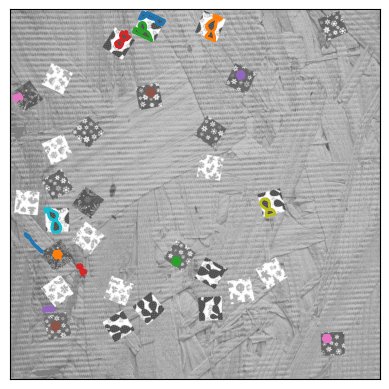

In [199]:
from skimage.measure import find_contours

# Find contours at a constant value of 0.8


# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(img[:,:,0], cmap=plt.cm.gray)

for contour in okay_cnt:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

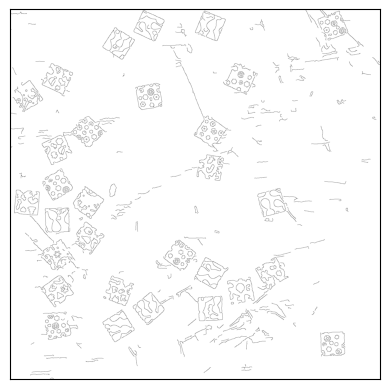

In [250]:
from skimage.feature import canny

img_gray_filter = skimage.filters.gaussian(img_gray,sigma=1.5)
edges2 = canny(img_gray_filter, sigma=2.7)

fig, ax = plt.subplots()
ax.imshow(1-edges2, cmap=plt.cm.gray)
ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

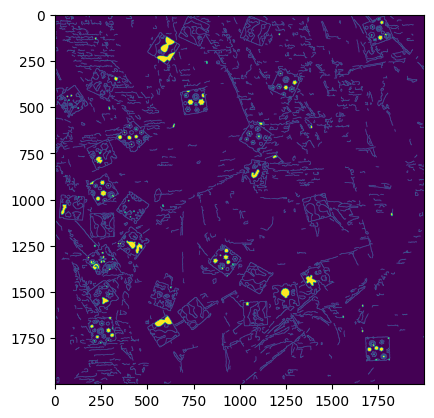

In [247]:

plt.imshow(skimage.morphology.area_closing(edges2, 1000000))

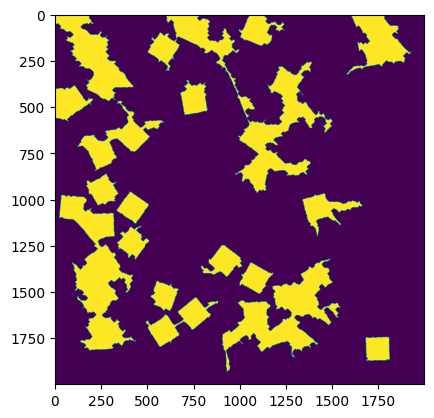

In [248]:
dil= skimage.morphology.dilation(edges2,)
for i in range(10):
    dil= skimage.morphology.dilation(dil,)
dil = skimage.morphology.remove_small_holes(dil,10000)
dil = skimage.morphology.remove_small_objects(dil,10000)
dil= skimage.morphology.erosion(dil,)
for i in range(11):
    dil= skimage.morphology.erosion(dil,)
dil = skimage.morphology.remove_small_objects(dil,10000)
plt.imshow(dil)


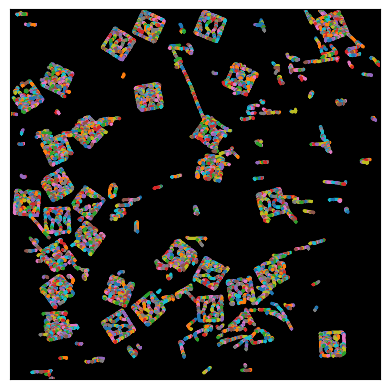

In [209]:
from skimage.measure import find_contours


# Find contours at a constant value of 0.8
contours =  find_contours(edges2)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(edges2, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

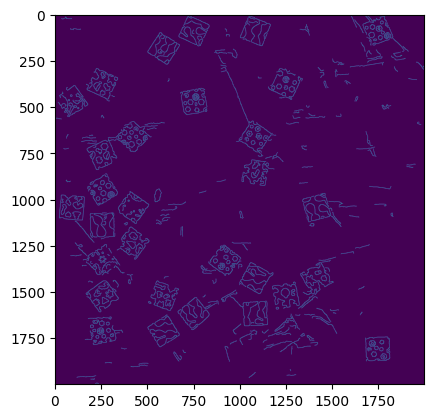

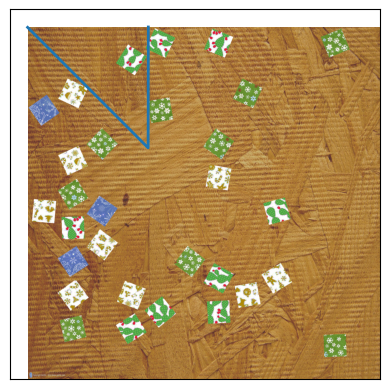

In [208]:


plt.imshow(edges2.astype(np.uint8))
# ret,thresh = cv.threshold(img,127,255,0)
im2,contours,= cv2.findContours(edges2.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# print(len(contours))
# cnt = contours[0][0]
# print(cnt.shape)

fig, ax = plt.subplots()
ax.imshow(img, cmap=plt.cm.gray)

for contour in contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [127]:
import numpy as np
import cv2 as cv

im = cv.imread("data_project/train/train_00.png")
assert im is not None, "file could not be read, check with os.path.exists()"
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_LIST , cv.CHAIN_APPROX_NONE )


In [128]:
print(len(contours))

45115


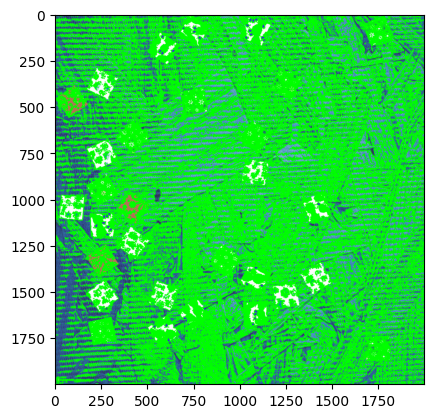

In [129]:
cv.drawContours(im, contours, -1, (0,255,0), 3)
plt.imshow(im)


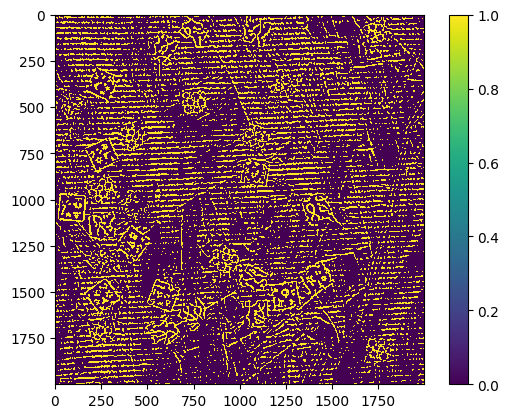

In [30]:
# img = cv2.imread('path_to_image', cv2.IMREAD_UNCHANGED)
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Function to perform Difference of Gaussians
def difference_of_Gaussians(img, k1, s1, k2, s2):
    b1 = cv2.GaussianBlur(img,(k1, k1), s1)
    b2 = cv2.GaussianBlur(img,(k2, k2), s2)
    return b1 - b2

DoG_img = difference_of_Gaussians(grayImage, 11, 11,21, 17)
plt.imshow(DoG_img<-5, interpolation="nearest")
plt.colorbar()

(0, 0, 1000, 1000)
(999, 999, 1000, 1000)
(999, 0, 1000, 1000)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(0, 999, 1000, 1000)


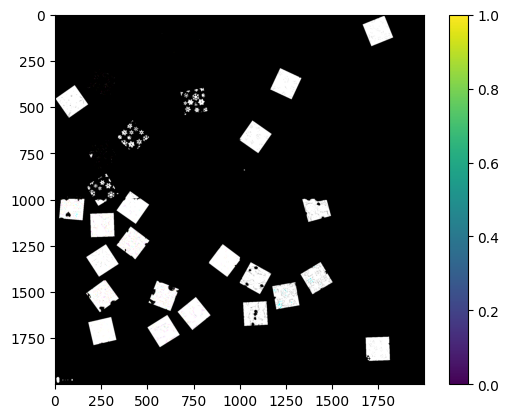

In [4]:
# Python program to illustrate
# foreground extraction using
# GrabCut algorithm

# organize imports
import numpy as np
import cv2
from matplotlib import pyplot as plt

# path to input image specified and
# image is loaded with imread command
image = cv2.imread('data_project/train/train_00.png')

# create a simple mask image similar
# to the loaded image, with the
# shape and return type
mask = np.zeros(image.shape[:2], np.uint8)

# specify the background and foreground model
# using numpy the array is constructed of 1 row
# and 65 columns, and all array elements are 0
# Data type for the array is np.float64 (default)
backgroundModel = np.zeros((1, 65), np.float64)
foregroundModel = np.zeros((1, 65), np.float64)
image_foreground = np.zeros(image.shape, np.float64)

# define the Region of Interest (ROI)
# as the coordinates of the rectangle
# where the values are entered as
# (startingPoint_x, startingPoint_y, width, height)
# these coordinates are according to the input image
# it may vary for different images

rectangles = [(0, 0,1000, 1000), (999, 999,1000, 1000), (999, 0,1000, 1000), (0, 999,1000, 1000)]

for rectangle in rectangles:
	# apply the grabcut algorithm with appropriate
	# values as parameters, number of iterations = 3
	# cv2.GC_INIT_WITH_RECT is used because
	# of the rectangle mode is used
	cv2.grabCut(image, mask, rectangle,
				backgroundModel, foregroundModel,
				3, cv2.GC_INIT_WITH_RECT)

	# In the new mask image, pixels will
	# be marked with four flags
	# four flags denote the background / foreground
	# mask is changed, all the 0 and 2 pixels
	# are converted to the background
	# mask is changed, all the 1 and 3 pixels
	# are now the part of the foreground
	# the return type is also mentioned,
	# this gives us the final mask
	mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')

	# The final mask is multiplied with
	# the input image to give the segmented image.
	print(rectangle)
	image_foreground = image * mask2[:, :, np.newaxis] + image_foreground

# output segmented image with colorbar
plt.imshow(image_foreground)
plt.colorbar()
plt.show()


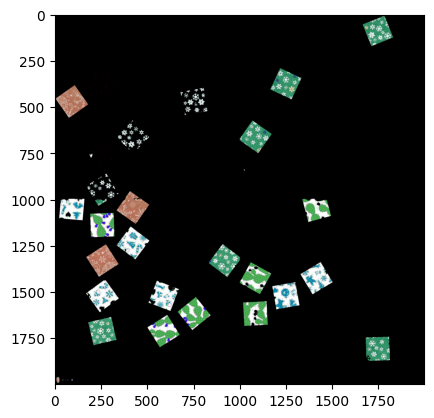

In [13]:
image_foreground_new = image_foreground.copy()
image_foreground_new[image_foreground_new>255]=255
np.unique(image_foreground_new.astype(int))
plt.imshow(image_foreground_new.astype(int))

(0, 0, 1000, 1000)


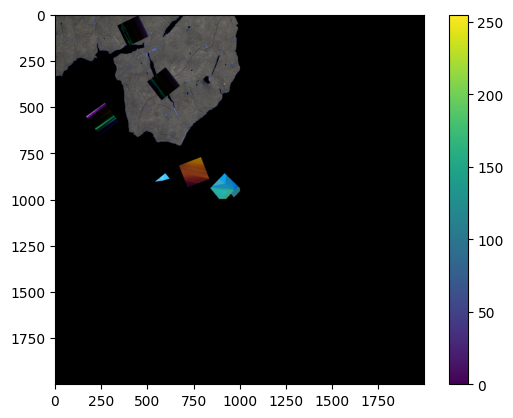

In [18]:
# Python program to illustrate
# foreground extraction using
# GrabCut algorithm

# organize imports
import numpy as np
import cv2
from matplotlib import pyplot as plt

# path to input image specified and
# image is loaded with imread command
image = cv2.imread("data_project/train/train_02.png")

# create a simple mask image similar
# to the loaded image, with the
# shape and return type
mask = np.zeros(image.shape[:2], np.uint8)

# specify the background and foreground model
# using numpy the array is constructed of 1 row
# and 65 columns, and all array elements are 0
# Data type for the array is np.float64 (default)
backgroundModel = np.zeros((1, 65), np.float64)
foregroundModel = np.zeros((1, 65), np.float64)
image_foreground = np.zeros(image.shape, np.int8)

# define the Region of Interest (ROI)
# as the coordinates of the rectangle
# where the values are entered as
# (startingPoint_x, startingPoint_y, width, height)
# these coordinates are according to the input image
# it may vary for different images

rectangles = [
    (0, 0, 1000, 1000),
    # (1000, 1000, 1000, 1000),
    # (1000, 0, 1000, 1000),
    # (0, 1000, 1000, 1000),
]

for rectangle in rectangles:
    # apply the grabcut algorithm with appropriate
    # values as parameters, number of iterations = 3
    # cv2.GC_INIT_WITH_RECT is used because
    # of the rectangle mode is used
    cv2.grabCut(
        image,
        mask,
        rectangle,
        backgroundModel,
        foregroundModel,
        3,
        cv2.GC_INIT_WITH_RECT,
    )

    # In the new mask image, pixels will
    # be marked with four flags
    # four flags denote the background / foreground
    # mask is changed, all the 0 and 2 pixels
    # are converted to the background
    # mask is changed, all the 1 and 3 pixels
    # are now the part of the foreground
    # the return type is also mentioned,
    # this gives us the final mask
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype("uint8")

    # The final mask is multiplied with
    # the input image to give the segmented image.
    print(rectangle)
    image_foreground = image * mask2[:, :, np.newaxis] 

# output segmented image with colorbar
plt.imshow(image_foreground)
plt.colorbar()
plt.show()

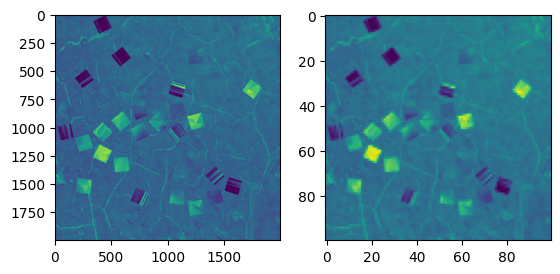

In [34]:
import numpy as np
from scipy import ndimage

def block_mean(ar, fact):
    assert isinstance(fact, int), type(fact)
    sx, sy = ar.shape
    X, Y = np.ogrid[0:sx, 0:sy]
    regions = sy//fact * (X//fact) + Y//fact
    res = ndimage.mean(ar, labels=regions, index=np.arange(regions.max() + 1))
    res.shape = (sx//fact, sy//fact)
    return res

ar = rgb2gray(cv2.imread("data_project/train/train_02.png"))
plt.subplot(1,2,1)
plt.imshow(ar)
plt.subplot(1,2,2)
plt.imshow(block_mean(ar, 20))  # (20, 40)

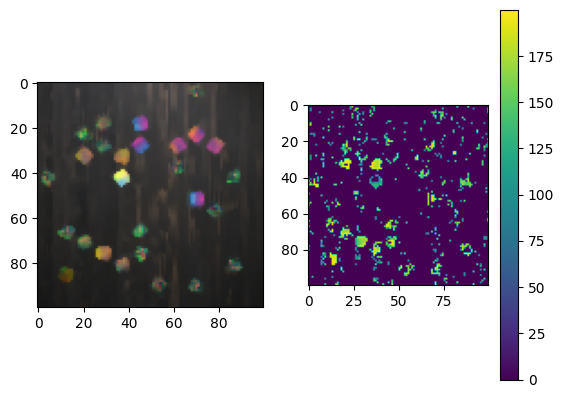

In [93]:
a = cv2.imread("data_project/train/train_08.png")
a = cv2.GaussianBlur(a,ksize=(11,11), sigmaX=3, sigmaY=3)
a = cv2.resize(a,dsize=(100,100))
a = cv2.cvtColor(a,cv2.COLOR_BGR2RGB)
c = cv2.medianBlur(a,ksize=3)
b = cv2.medianBlur(a,ksize=11)
plt.subplot(1,2,1)
plt.imshow(c)
plt.subplot(1,2,2)
d = rgb2gray(b-c).copy()
d[np.abs(d)<100]= 0
d[np.abs(d)>200]= 0
plt.imshow(d)
plt.colorbar()


(0, 0, 50, 50)
(50, 50, 50, 50)
(50, 0, 50, 50)
(0, 50, 50, 50)


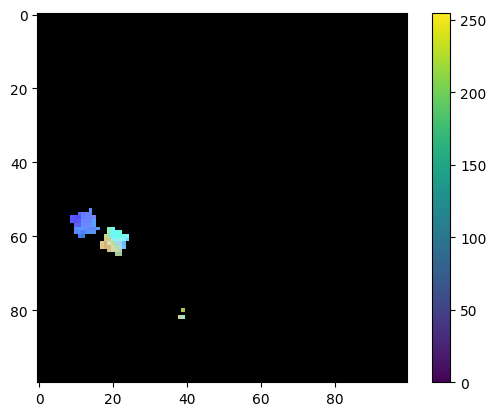

In [40]:


# Python program to illustrate
# foreground extraction using
# GrabCut algorithm

# organize imports
import numpy as np
import cv2
from matplotlib import pyplot as plt

# path to input image specified and
# image is loaded with imread command
image = cv2.resize(cv2.imread("data_project/train/train_02.png"),dsize=(100,100))
# create a simple mask image similar
# to the loaded image, with the
# shape and return type
mask = np.zeros(image.shape[:2], np.uint8)

# specify the background and foreground model
# using numpy the array is constructed of 1 row
# and 65 columns, and all array elements are 0
# Data type for the array is np.float64 (default)
backgroundModel = np.zeros((1, 65), np.float64)
foregroundModel = np.zeros((1, 65), np.float64)
image_foreground = np.zeros(image.shape, np.int8)

# define the Region of Interest (ROI)
# as the coordinates of the rectangle
# where the values are entered as
# (startingPoint_x, startingPoint_y, width, height)
# these coordinates are according to the input image
# it may vary for different images

rectangles = [
    (0, 0, 50, 50),
    (50, 50, 50, 50),
    (50, 0, 50, 50),
    (0, 50, 50, 50),
]

for rectangle in rectangles:
    # apply the grabcut algorithm with appropriate
    # values as parameters, number of iterations = 3
    # cv2.GC_INIT_WITH_RECT is used because
    # of the rectangle mode is used
    cv2.grabCut(
        image,
        mask,
        rectangle,
        backgroundModel,
        foregroundModel,
        3,
        cv2.GC_INIT_WITH_RECT,
    )

    # In the new mask image, pixels will
    # be marked with four flags
    # four flags denote the background / foreground
    # mask is changed, all the 0 and 2 pixels
    # are converted to the background
    # mask is changed, all the 1 and 3 pixels
    # are now the part of the foreground
    # the return type is also mentioned,
    # this gives us the final mask
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype("uint8")

    # The final mask is multiplied with
    # the input image to give the segmented image.
    print(rectangle)
    image_foreground = image * mask2[:, :, np.newaxis] 

# output segmented image with colorbar
plt.imshow(image_foreground)
plt.colorbar()
plt.show()